<a href="https://colab.research.google.com/github/reni-hristova/Classification-Fashion-MNIST/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"Import and rename libraries needed for all models"
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

# Import Tensorflow Dataset

In [ ]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

In [ ]:
# Save the dataaset from tensorflow_datasets (tfds)
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Save class names
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
"Preprocessing the data"
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

## Visualisation

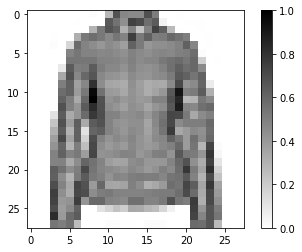

In [ ]:
# Plot the image - show a piece of fashion clothing 
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

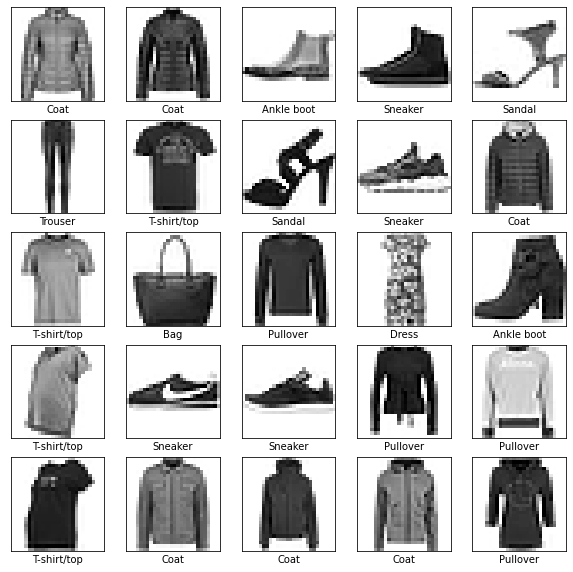

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

# Import Keras dataset

In [2]:
# Import Fashion MNIST dataset from Keras 
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Save Class names for visualisation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualisation

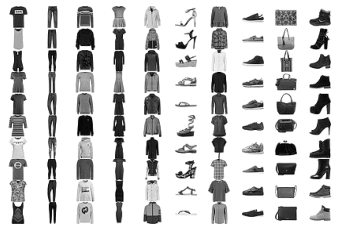

In [ ]:
# Visualisation
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap=plt.cm.binary)
        ax[j,i].set_axis_off()
plt.savefig('mnist-10x10.pdf')

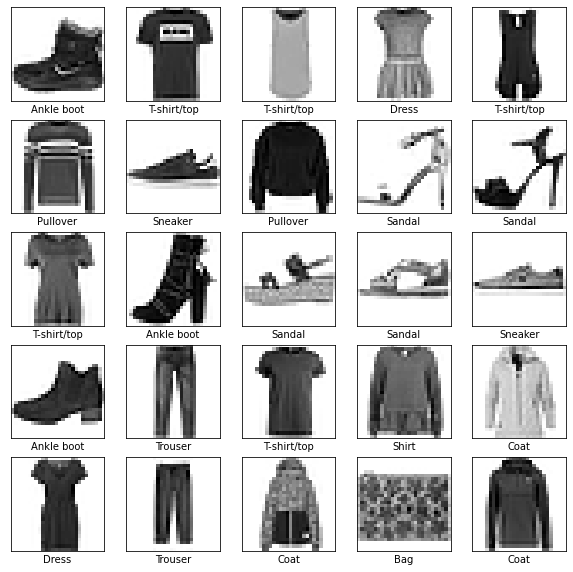

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

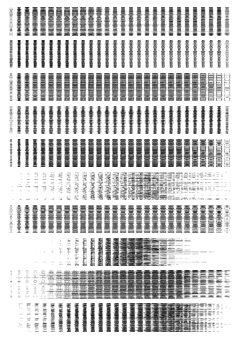

In [ ]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap=plt.cm.binary)
    ax[i].set_axis_off()
plt.savefig('mnist-vectorised.pdf')

# Preprocessing

In [3]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0

# KNN - Leandro Minku

In [ ]:
from scipy.stats import mode
def knn(test_set, train_set, train_labels, k):
    # Returns the most common label in the training set of the k-nn for each element in the test set.
    predictions = []
    for i in test_set:
        distances = [np.linalg.norm(i-j) for j in train_set] # Distance metric
        indices = np.argsort(distances)[0:k]
        predictions.append(mode(train_labels[indices])[0][0])
    return predictions

def knn_evaluate(predicted_labels, true_labels):
    print("KNN evaluate start")
    confusion_matrix = np.zeros([10,10])
    for i, l in enumerate(true_labels):
        confusion_matrix[l, predicted_labels[i]] += 1
    for i,c in enumerate(confusion_matrix):
        print(str(i) + ' & ' + ' & '.join(['{:3.0f}'.format(i) for i in c]) + '\\ \hline')
    plt.imshow(confusion_matrix,cmap='gray')
    plt.tight_layout()
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))

In [ ]:
train_index = []
test_index = []
for i in range(10):
    train_index.append(np.where(train_labels==i)[0][0:]) # Take only n_train number of samples from training data
    test_index.append(np.where(test_labels==i)[0][0:]) # Take only n_test number of samples from training data
train_index = [item for sublist in train_index for item in sublist]
test_index = [item for sublist in test_index for item in sublist]

KNN evaluate start
0 & 669 &  16 &  62 & 131 &   8 &   5 &  92 &   1 &  16 &   0\ \hline
1 &  11 & 911 &   6 &  56 &   1 &   1 &  12 &   1 &   1 &   0\ \hline
2 &  34 &  10 & 703 &  65 &  53 &   5 & 117 &   0 &  13 &   0\ \hline
3 &  57 &  62 &  22 & 771 &  54 &   0 &  30 &   0 &   4 &   0\ \hline
4 &  34 &  19 & 459 &  78 & 244 &   0 & 155 &   0 &  11 &   0\ \hline
5 &   2 &  74 &   4 & 294 &   4 & 381 &   2 & 107 &  69 &  63\ \hline
6 & 205 &  26 & 188 & 139 &  47 &  10 & 367 &   2 &  16 &   0\ \hline
7 &   0 &  15 &   0 &  14 &   0 & 227 &   0 & 659 &  12 &  73\ \hline
8 &  43 &  24 &  77 &  48 &  20 &  37 &  25 &  55 & 666 &   5\ \hline
9 &   8 &  14 &  17 &  10 &   0 &  38 &   3 & 124 &  74 & 712\ \hline
0.6083


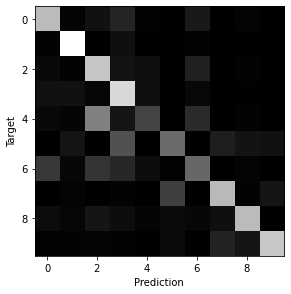

In [ ]:
p = knn(test_set[test_index], train_set[train_index], train_labels[train_index], 4) # k = 4
knn_evaluate(p, test_labels[test_index])
plt.savefig('knn-k=4-all-confusion.pdf')

# KNN - Sklearn

In [4]:
# Change the dimentions of the data
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
print(test_set.shape)
print(train_set.shape)

(10000, 784)
(60000, 784)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# number of neighbours
KNN_NEIGHBOURS = 4

classifier = KNeighborsClassifier(metric = 'euclidean', n_neighbors = KNN_NEIGHBOURS)
classifier.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

# Evaluation

In [ ]:
# Predict labels for the test set
predicted_labels = classifier.predict(test_set)

# Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix

print("test_shape", test_set.shape)
print(train_set.shape)

print("Number of Neighbours is ", KNN_NEIGHBOURS)
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix(test_labels, predicted_labels))
print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))